In [1]:
cd ../..

c:\Users\Yago\Desktop\GISD\TFG\code\cfe_rl


c:\Users\Yago\Desktop\GISD\TFG\code\cfe_rl\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from src.agents import load_saved_experiment, obtain_cfes, evaluate_cfes
from src.utils import plot_signal

In [3]:
# def calculate_cfe(x1, x2, mask):
#     return np.where(mask, x2, x1)

In [4]:
experiment = "504afdfa3dac"

agent, env, data = load_saved_experiment(experiment)
agent, env, data

Agent loaded successfully from results\504afdfa3dac\model.zip


(<stable_baselines3.dqn.dqn.DQN at 0x1dfb40e6d40>,
 <FlatToStartStepWrapper(mode=triangular, actions=300) <DiscreteEnv(data=chinatown, model=FCN, weights={'adversarial': 0.2, 'sparsity': 0.24, 'contiguity': 0.36, 'plausability': 0.2})>>,
 <DataManager(dataset='chinatown', model='FCN')>)

In [5]:
samples, labels, nuns = data.get_test_samples()
samples.shape

torch.Size([99, 1, 24])

In [6]:
cfes = obtain_cfes(samples, labels, nuns, env, agent)
results = evaluate_cfes(cfes, data.model)
results

,sample,nun,mask,step,reward,proba,subsequences,num_changes,perc_changes,L1,L2,valid
0,"[[tensor(-0.2541), tensor(-0.5790), tensor(-0....","[[tensor(-0.9508), tensor(-1.0672), tensor(-1....","[[True, True, True, True, True, False, False, ...",1,-0.150510,0.999436,2,6,0.25,2.137005,0.992797,1
1,"[[tensor(0.4576), tensor(0.2172), tensor(0.519...","[[tensor(-1.0691), tensor(-1.0691), tensor(-0....","[[True, True, True, True, True, False, False, ...",1,-0.112813,0.995571,2,6,0.25,6.690817,3.059169,1
2,"[[tensor(-0.2691), tensor(-0.4644), tensor(-0....","[[tensor(-0.9302), tensor(-1.0766), tensor(-1....","[[True, True, True, True, True, False, False, ...",1,-0.147009,0.991370,2,6,0.25,2.144517,1.010104,1
3,"[[tensor(-0.0382), tensor(-0.5884), tensor(-0....","[[tensor(-0.9245), tensor(-1.0578), tensor(-1....","[[True, True, True, True, True, False, False, ...",1,-0.108310,0.979693,2,6,0.25,2.146394,1.088856,1
4,"[[tensor(-0.4644), tensor(-0.6766), tensor(-0....","[[tensor(-0.9508), tensor(-1.0672), tensor(-1....","[[True, True, True, True, True, True, True, Tr...",0,-0.233500,0.999613,1,24,1.00,7.055122,1.685307,1
...,...,...,...,...,...,...,...,...,...,...,...,...
94,"[[tensor(-0.3612), tensor(-0.6278), tensor(-0....","[[tensor(-0.9245), tensor(-1.0578), tensor(-1....","[[True, True, True, True, True, False, False, ...",1,-0.108205,0.999984,2,6,0.25,1.639372,0.797733,1
95,"[[tensor(-0.3837), tensor(-0.6147), tensor(-0....","[[tensor(-0.9283), tensor(-0.9996), tensor(-1....","[[True, True, True, True, True, False, False, ...",1,-0.121429,0.999049,2,6,0.25,1.402762,0.709113,1
96,"[[tensor(-0.1809), tensor(-0.2860), tensor(-0....","[[tensor(-0.7142), tensor(-0.8738), tensor(-0....","[[True, True, True, True, True, True, True, Tr...",0,-0.233504,0.999594,1,24,1.00,8.855989,2.346114,1
97,"[[tensor(-0.5846), tensor(-0.8043), tensor(-0....","[[tensor(-0.9245), tensor(-1.0578), tensor(-1....","[[True, True, True, True, True, False, False, ...",1,-0.193948,0.999696,2,6,0.25,1.081648,0.502397,1


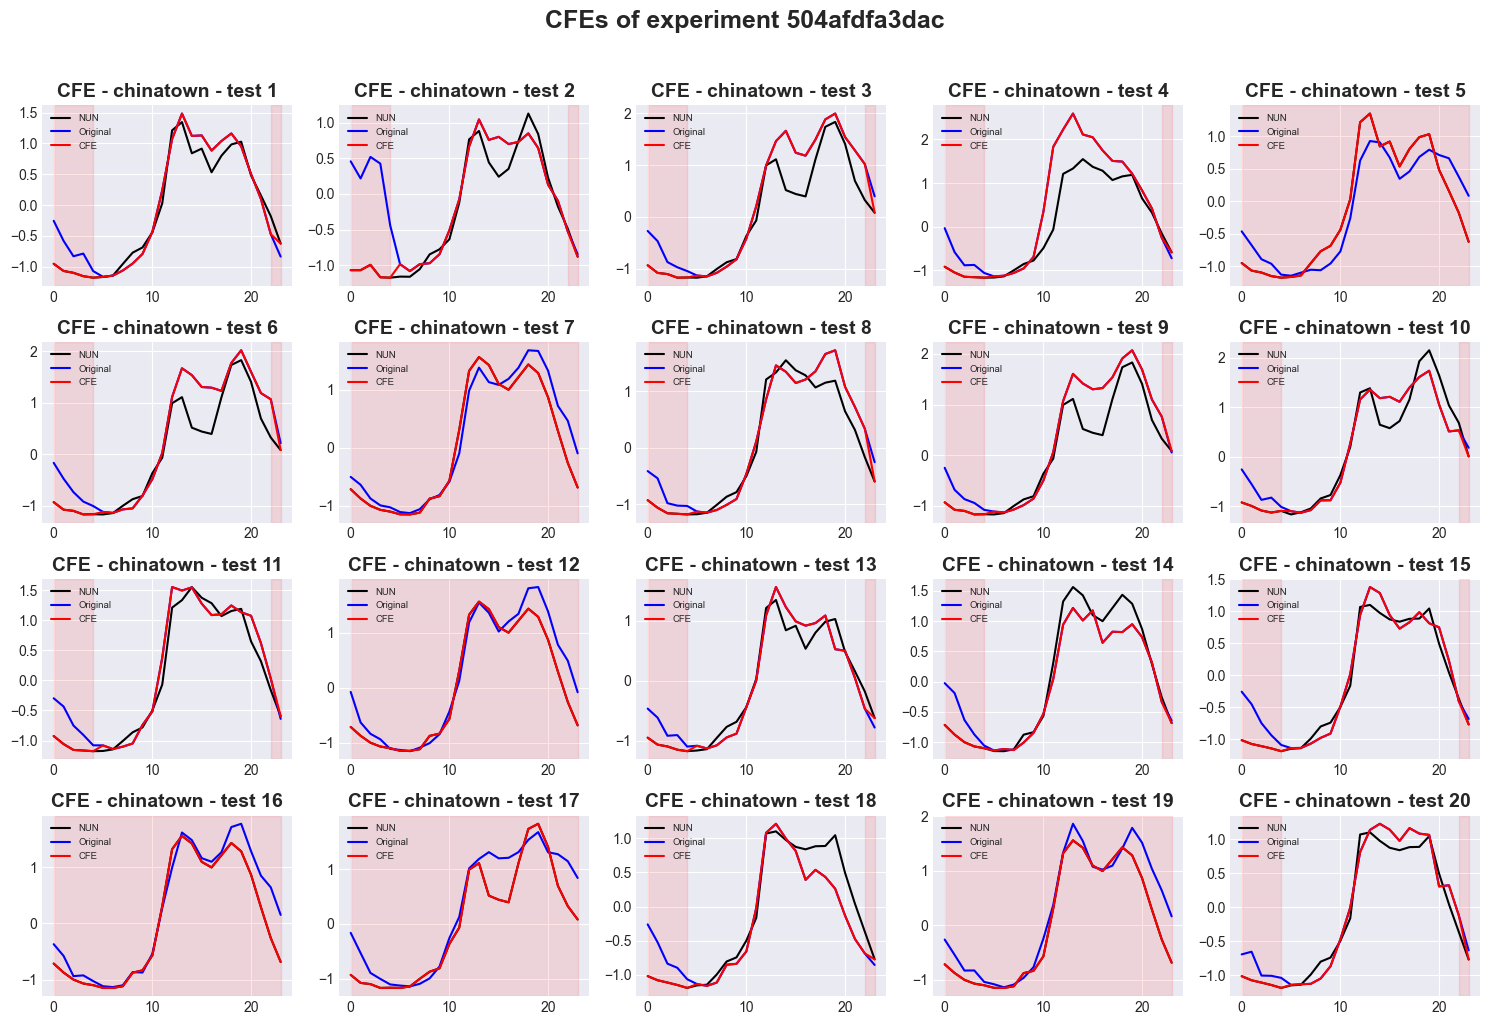

In [7]:
plt.style.use("seaborn-v0_8-darkgrid")
fig, axes = plt.subplots(4, 5, figsize=(15, 10))
axes = axes.flatten()
fig.suptitle(f'CFEs of experiment {experiment}', fontsize=18, fontweight='bold', y=1.02)
for i in range(min(20, len(results))):
    orig = results.iloc[i]["sample"]
    nun = results.iloc[i]["nun"]
    mask = results.iloc[i]["mask"]
    plot_signal(X=orig, X2=nun, mask=mask, ax=axes[i], title=f"{data.name} - test {i+1}")
plt.tight_layout()
fig.savefig(f"./experiments/notebooks/cfes_{experiment}.png")